# Week 12. In-Class Practice

### 引入自然語言處理 package: nltk 

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.tag import pos_tag
from nltk import ne_chunk, Tree
from nltk.corpus import treebank
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kevink556\AppData\Roaming\nltk_data...


### 讀進新聞資料

In [2]:
with open('./dataset/news.txt','r') as file:
    news = file.readlines()
len(news)

38

### 使用 nltk 進行斷詞、標籤，並完成句法樹

In [3]:
news_concated = " ".join(news)
news_tokenized = nltk.word_tokenize(news_concated)
news_tagged = nltk.pos_tag(news_tokenized)
news_tagged[0:10] 

[('Hong', 'NNP'),
 ('Kong', 'NNP'),
 ('(', '('),
 ('CNN', 'NNP'),
 (')', ')'),
 ('The', 'DT'),
 ('major', 'JJ'),
 ('defeat', 'NN'),
 ('for', 'IN'),
 ('Taiwan', 'NNP')]

In [5]:
news_entities = nltk.ne_chunk(news_tagged, binary=False)
type(news_entities)

nltk.tree.Tree

### 簡單拆解 nltk.Tree 
 - 句法樹的葉子都是`tuple`， `x[0]`是內容， `x[1]`是標籤
 - 樹和子樹的標籤可以用`label()`這個方法 (method) 取得，但葉子的的標籤必須透過前述的indexing
 - `Tree`這個型別是iterable的，所以可以用 indexing 的方法遍歷
 - `nltk.Tree.pprint()`可以展開整棵句法樹

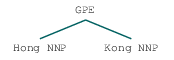

In [6]:
news_entities[0]

In [7]:
news_entities[0].label()

'GPE'

In [8]:
print(news_entities[0][0],
      news_entities[0][1])

('Hong', 'NNP') ('Kong', 'NNP')


#### nltk的句法樹可以作圖，但是文字量有點多，在此不建議使用

In [9]:
# news_entities.draw()

### 將標籤後的詞彙依標籤取出

In [53]:
def get_continuous_chunks(text, label):
    chunked = ne_chunk(pos_tag(word_tokenize(text)))
    prev = None
    continuous_chunk = []
    current_chunk = []

    for subtree in chunked:
        if type(subtree) == Tree and subtree.label() == label:
            current_chunk.append(" ".join([token for token, pos in subtree.leaves()]))
        elif current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in continuous_chunk:
                continuous_chunk.append(named_entity)
                current_chunk = []
        else:
            continue
    return continuous_chunk

get_continuous_chunks(news_concated, 'GPE')

['Hong Kong',
 'Taiwan',
 'Beijing',
 'Taiwan Taichung',
 'Taiwan Kaohsiung',
 'Taiwan Taiwan Strait',
 'Taiwan Taiwan',
 'China',
 'China Taiwan',
 'China Singapore',
 'China Taipei',
 'Beijing Taiwan Strait',
 'Taiwan Taiwan Taiwan',
 'Taiwan Chinese',
 'Singapore',
 'Taiwan Taiwan China',
 'China Beijing',
 'Taiwan Beijing',
 'Chinese',
 'Taiwan Taiwan China Taiwan',
 'Taiwan Beijing Tsai',
 'Taiwan China',
 'Taiwan Strait',
 'Taiwan Taiwan Taiwan Beijing',
 'Taiwan East Asia',
 'China Beijing Taiwan',
 'Beijing Washington',
 'China China',
 'Taiwan China Washington',
 'China China Taiwan',
 'Taiwan Taiwan China Washington',
 'China Washington',
 'China China China',
 'United States']

In [54]:
def get_by_label(chunked_tree, label):
    continuous_chunk = [" ".join([x[0] for x in subtree])
                                for subtree in chunked_tree if (type(subtree)==Tree and subtree.label()==label)]
    continuous_chunk += [leaf[0] for leaf in chunked_tree.leaves() if leaf[1]==label]
    continuous_chunk = list(set(continuous_chunk))
    return continuous_chunk

get_by_label(news_entities, "GPE") # 地名

['Taiwan',
 'Taichung',
 'Washington',
 'Taipei',
 'United States',
 'China',
 'Tsai',
 'Chinese',
 'Kaohsiung',
 'Hong Kong',
 'Singapore',
 'Beijing',
 'Taiwan Strait',
 'East Asia']

In [55]:
get_by_label(news_entities, "VBZ") # 動詞

['creates',
 'seeks',
 'makes',
 'resigns',
 'has',
 'carries',
 'remains',
 'fits',
 'lies',
 'pays',
 'is',
 'preaches']